<h1>YOLO 사물 인식</h1>

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/swkim01/DSAC5/blob/main/gg-15-YOLO_사물_인식.ipynb"><img src="https://github.com/swkim01/DSAC5/raw/main/colab_logo_32px.png" />구글 코랩에서 실행</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/swkim01/DSAC5/blob/main/gg-15-YOLO_사물_인식.ipynb"><img src="https://github.com/swkim01/DSAC5/raw/main/GitHub-Mark-32px.png" />깃헙에서 소스 보기</a>
  </td>
</table>

<h3>이 장에서는 YOLO를 사용하는 방법만을 실습해보도록 한다.</h3>

실습예제의 YOLO_v3_tutorial_from_scratch-master.zip 파일을 코랩 환경의 '/content/data'로 업로드한다.

In [15]:
#%%shell
! mkdir -p data
! curl -L https://github.com/ayooshkathuria/YOLO_v3_tutorial_from_scratch/archive/master.zip -o data/YOLO_v3_tutorial_from_scratch-master.zip
! unzip data/YOLO_v3_tutorial_from_scratch-master.zip; mv YOLO_v3_tutorial_from_scratch-master yolo
#from zipfile import ZipFile
#with ZipFile('data/YOLO_v3_tutorial_from_scratch-master.zip', 'r') as zf:
#    zf.extractall('yolo/')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   149  100   149    0     0   4138      0 --:--:-- --:--:-- --:--:--  4138
100 1918k  100 1918k    0     0  12.9M      0 --:--:-- --:--:-- --:--:-- 12.9M
Archive:  data/YOLO_v3_tutorial_from_scratch-master.zip
8264dfba39a866998b8936a24133f41f12bfbdb7
   creating: YOLO_v3_tutorial_from_scratch-master/
  inflating: YOLO_v3_tutorial_from_scratch-master/README.md  
   creating: YOLO_v3_tutorial_from_scratch-master/cfg/
  inflating: YOLO_v3_tutorial_from_scratch-master/cfg/yolov3.cfg  
  inflating: YOLO_v3_tutorial_from_scratch-master/darknet.py  
   creating: YOLO_v3_tutorial_from_scratch-master/data/
  inflating: YOLO_v3_tutorial_from_scratch-master/data/coco.names  
  inflating: YOLO_v3_tutorial_from_scratch-master/data/voc.names  
  inflating: YOLO_v3_tutorial_from_scratch-master/detect.py  
  inflating: YOLO_v3_tutorial_from_s

In [17]:
! curl -L https://pjreddie.com/media/files/yolov3.weights -o yolo/yolov3.weights
! curl -L https://pjreddie.com/media/files/yolov3-tiny.weights -o yolo/yolov3-tiny.weights

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  236M  100  236M    0     0   433k      0  0:09:18  0:09:18 --:--:--  390k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 33.7M  100 33.7M    0     0   378k      0  0:01:31  0:01:31 --:--:--  364k


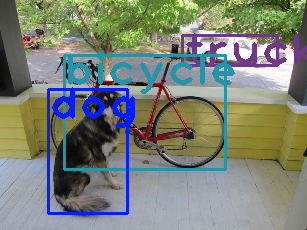

-1

In [22]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load Yolo
net = cv2.dnn.readNet("yolo/yolov3.weights", "yolo/cfg/yolov3.cfg")
classes = []
with open("yolo/data/coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

# Loading image
img = cv2.imread("yolo/imgs/dog.jpg")
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 3, color, 3)

cv2_imshow(img)
#cv2.imshow("result", img)
cv2.waitKey(0)